# 1. Data Collection

We are using 3 datasets in the training process:
* CelebA dataset
* Women faces with hijab
* The dataset we have collected from the university students

In [1]:
import sys
sys.path.append("path/to/UTILITY SCRIPTS/utility")

import utility  # Now you can use utility.py functions

In [2]:
from utility.utility import datacleaner

## 1.1 Collecting Student faces
Here we are collect the students data and organize it in a directory

## 1.2 Data Exploration

### 1. CelebA dataset

In [7]:
CELEBA_PATH = "/kaggle/input/face-vae/img_align_celeba/img_align_celeba"

In [8]:
# Checking the extentions in the dataset
non_jpg = datacleaner.extention_checker(CELEBA_PATH)

100%|██████████| 202599/202599 [14:11<00:00, 237.98it/s]

Number of JPG images found: 202599
Number of non-JPG images found: 0


[CelebA](https://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset has 202599 JPG images and 0 non-JPG.
I trust this dataset it is well known good dataset and after some research about the dataset on the internet I concluded that they are all high quality images all with the same size (178, 218).

### 2.Hijab dataset 
We went to look for hijab dataset because the first dataset has few hijab images or not at all.
So we need to cure the imbalance and this biased model. We found small dataset but we need to check it first.

In [3]:
HIJAB_PATH = "/kaggle/input/women-faces-with-hijabscientific-use-only"

In [13]:
# Checking the extentions in the dataset
non_jpg = datacleaner.extention_checker(HIJAB_PATH)

100%|██████████| 112/112 [00:00<00:00, 403.81it/s]

Number of JPG images found: 112
Number of non-JPG images found: 0


We check for the extentions and now we need to check for the quality of the dataset. We can plot some random sample of 10 images.

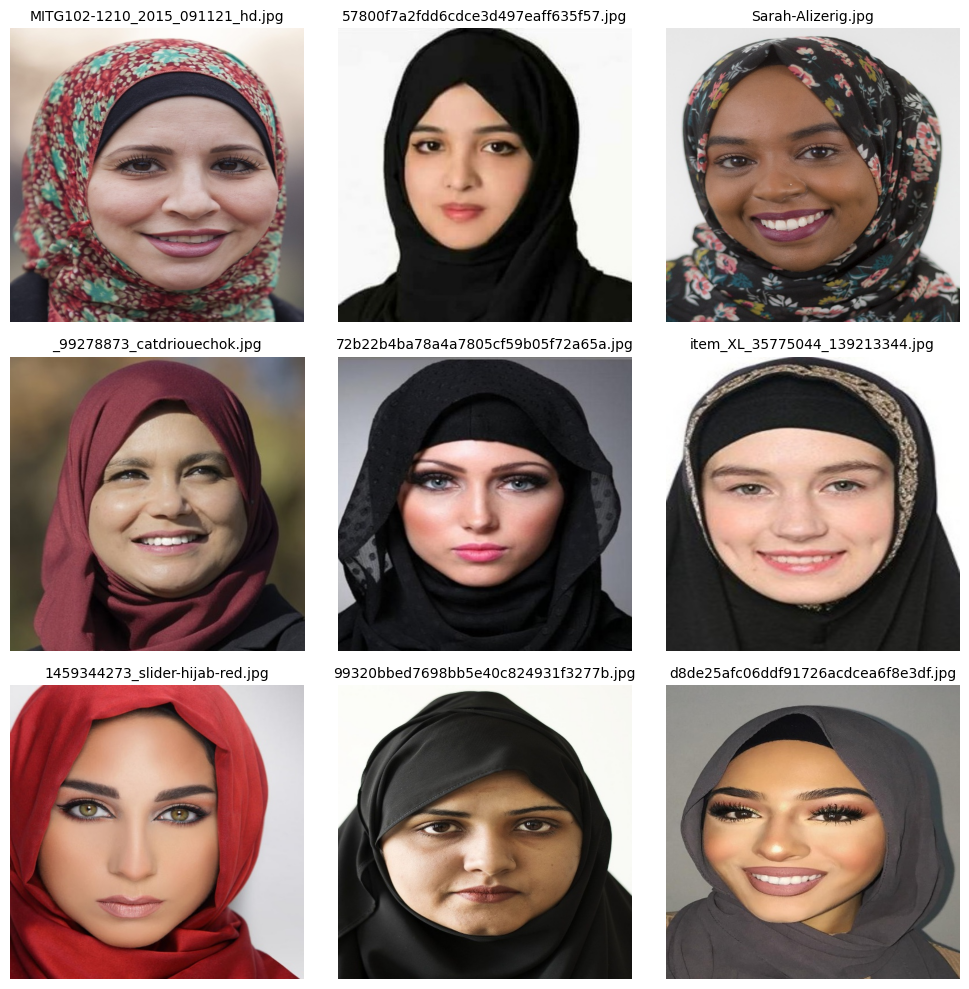

In [4]:
datacleaner.sample_plot(HIJAB_PATH)

As you can see their are images with low quality, we can try to fix these images in the preprocessing section.

#### Checking for the blurry images and the sharpest images.

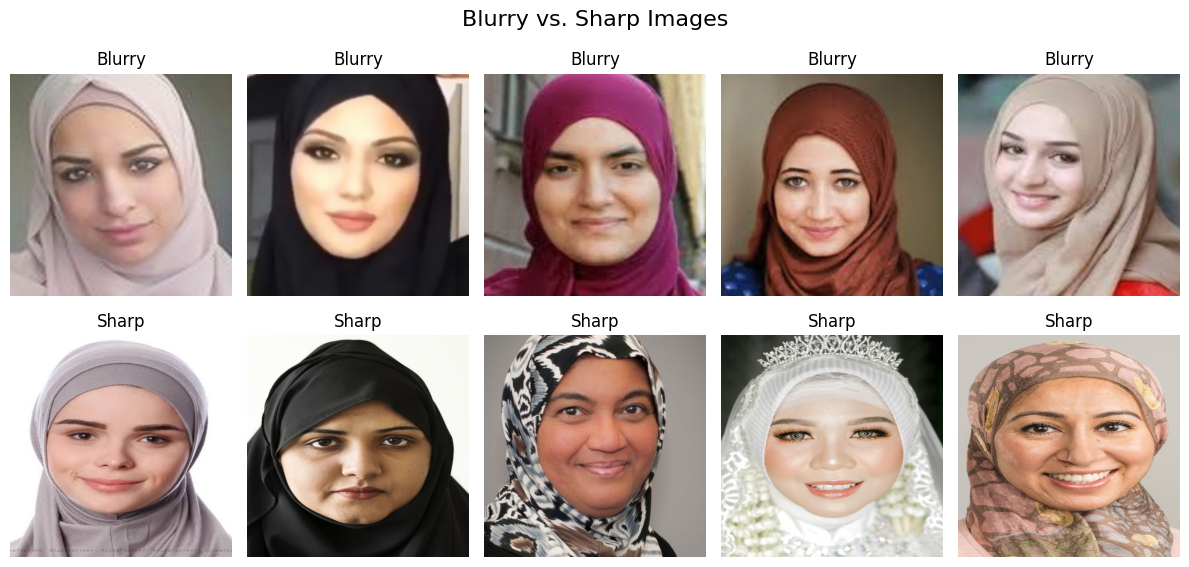

In [5]:
blurry, sharpe = datacleaner.check_blur_in_folder(HIJAB_PATH)

The blurred images aren't that bad we can apply sharpning kernel to sharpen the image more.

In [ ]:
# Warning! uncomment el cell dy lma nigy n run locally 3l4an kaggle msh bism7 b ms7 el swr mn folder el data el asly


# import os

# # After taking a look on the data these two images are low resolution and has too many problems
# os.remove("/kaggle/input/women-faces-with-hijabscientific-use-only/712327_2607224_book_magazine.jpg")
# os.remove("/kaggle/input/women-faces-with-hijabscientific-use-only/a9cae86f6bd5181f62d70c0df9b5df62.jpg")

In this dataset I need to check the size of the images in it.

In [6]:
import cv2
import os
from collections import Counter

def check_image_sizes(folder_path):
    sizes = []
    for file in os.listdir(folder_path):
        img_path = os.path.join(folder_path, file) # Get the path of each image
        img = cv2.imread(img_path) # Read it
        if img is not None:
            sizes.append(img.shape[:2])  # (Height, Width)

    print("Image size distribution:", Counter(sizes)) # Count number of occerunce of each image size

In [7]:
check_image_sizes(HIJAB_PATH)

Image size distribution: Counter({(512, 512): 112})


Darkest images: [('hijab-images-rmaziaty-07-623x779.jpg', 61.5238037109375), ('hijab-stock-photo.jpg', 71.68714141845703), ('d176eca4bfffd02bf2d111da73114c34.jpg', 76.46342849731445), ('KardashianHijab-13a43b7a24a5c8f27c72e29ddd873ee1.jpg', 79.56765747070312), ('72b22b4ba78a4a7805cf59b05f72a65a.jpg', 81.53905868530273)]
Brightest images: [('31x-pXJG2mL._AC_UY445_.jpg', 212.1914939880371), ('41rYIJhKEL._AC_UL1080_ (1).jpg', 215.7751922607422), ('inasdia.jpg', 219.60456085205078), ('hijab-images-rmaziaty-18-623x771 (1).jpg', 223.13478469848633), ('59e7cc6614000025068c88b5.jpg', 225.4528579711914)]


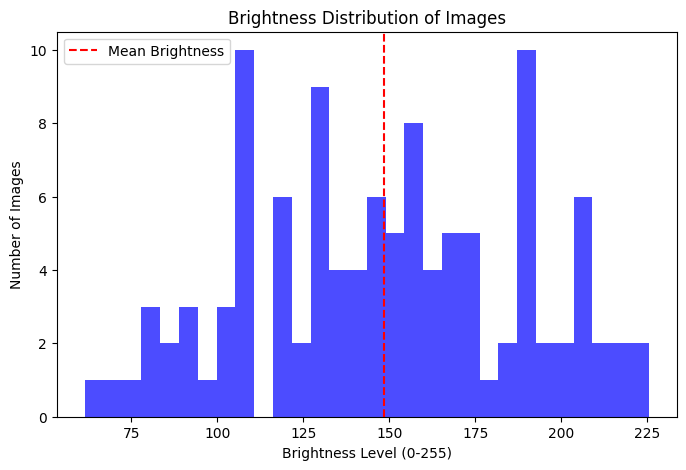

In [7]:
bright_images = datacleaner.check_brightness_in_folder(HIJAB_PATH)

### 3. Students dataset

## 1.3 Face detection and cropping

## 1.4 Data preprocessing